In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.calibration import CalibratedClassifierCV
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [19]:
#loading data
df = pd.read_csv(r'./data/diabetes_dataset.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 16 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   year                  100000 non-null  int64  
 1   gender                100000 non-null  object 
 2   age                   100000 non-null  float64
 3   location              100000 non-null  object 
 4   race:AfricanAmerican  100000 non-null  int64  
 5   race:Asian            100000 non-null  int64  
 6   race:Caucasian        100000 non-null  int64  
 7   race:Hispanic         100000 non-null  int64  
 8   race:Other            100000 non-null  int64  
 9   hypertension          100000 non-null  int64  
 10  heart_disease         100000 non-null  int64  
 11  smoking_history       100000 non-null  object 
 12  bmi                   100000 non-null  float64
 13  hbA1c_level           100000 non-null  float64
 14  blood_glucose_level   100000 non-null  int64  
 15  d

In [20]:
df.describe()

,year,age,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,bmi,hbA1c_level,blood_glucose_level,diabetes
count,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.00000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,2018.360820,41.885856,0.202230,0.200150,0.198760,0.19888,0.199980,0.07485,0.039420,27.320767,5.527507,138.058060,0.085000
std,1.345239,22.516840,0.401665,0.400114,0.399069,0.39916,0.399987,0.26315,0.194593,6.636783,1.070672,40.708136,0.278883
min,2015.000000,0.080000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,10.010000,3.500000,80.000000,0.000000
25%,2019.000000,24.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,23.630000,4.800000,100.000000,0.000000
50%,2019.000000,43.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,27.320000,5.800000,140.000000,0.000000
75%,2019.000000,60.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,29.580000,6.200000,159.000000,0.000000
max,2022.000000,80.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.00000,1.000000,95.690000,9.000000,300.000000,1.000000


In [21]:
df

,year,gender,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes
0,2020,Female,32.0,Alabama,0,0,0,0,1,0,0,never,27.32,5.0,100,0
1,2015,Female,29.0,Alabama,0,1,0,0,0,0,0,never,19.95,5.0,90,0
2,2015,Male,18.0,Alabama,0,0,0,0,1,0,0,never,23.76,4.8,160,0
3,2015,Male,41.0,Alabama,0,0,1,0,0,0,0,never,27.32,4.0,159,0
4,2016,Female,52.0,Alabama,1,0,0,0,0,0,0,never,23.75,6.5,90,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2018,Female,33.0,Wyoming,0,0,0,0,1,0,0,never,21.21,6.5,90,0
99996,2016,Female,80.0,Wyoming,0,1,0,0,0,0,0,No Info,36.66,5.7,100,0
99997,2018,Male,46.0,Wyoming,0,1,0,0,0,0,0,ever,36.12,6.2,158,0
99998,2018,Female,51.0,Wyoming,1,0,0,0,0,0,0,not current,29.29,6.0,155,0


<Axes: >

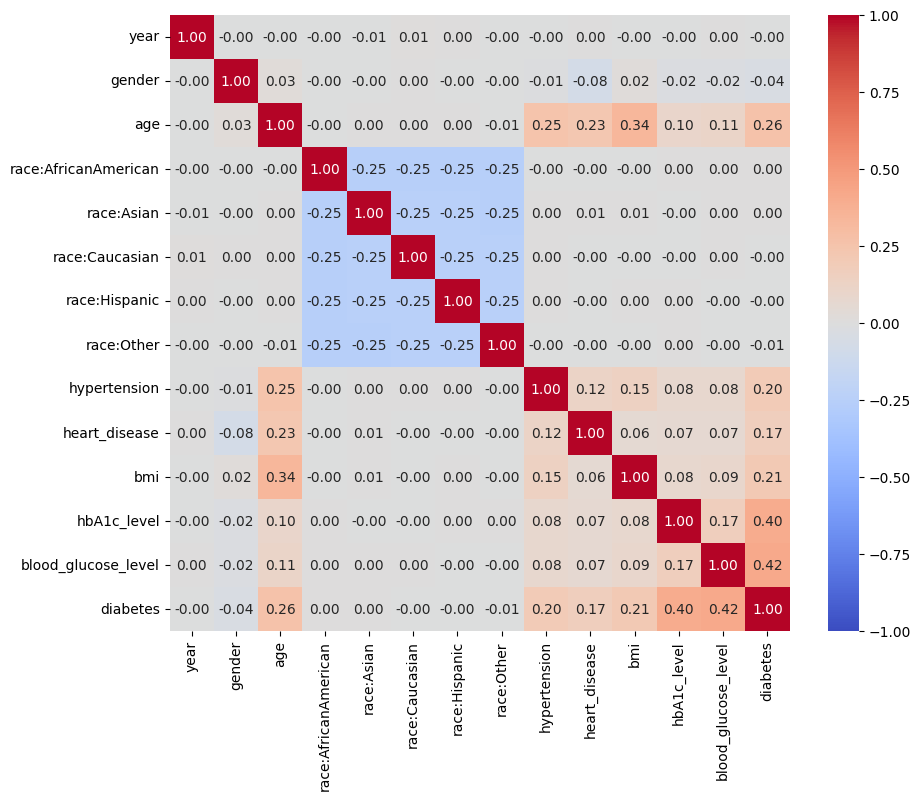

In [22]:
df_temp = df.copy()
df_temp['gender'] = df.gender == 'Female'
df_temp.drop(['location', 'smoking_history'], axis=1, inplace=True)

plt.figure(figsize=(10, 8))
sns.heatmap(df_temp.corr(), annot=True, cmap='coolwarm', fmt=".2f", vmin=-1, vmax=1)

<Axes: >

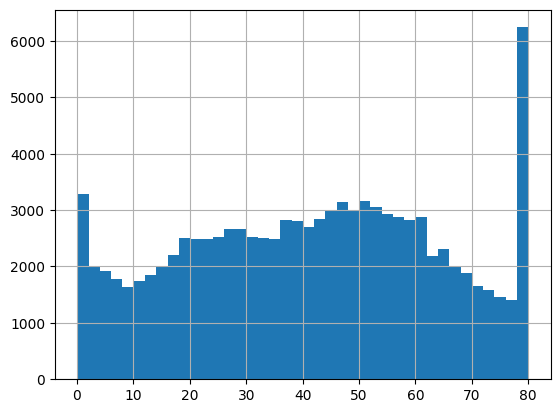

In [25]:
df.age.hist(bins=40)

<Axes: xlabel='diabetes', ylabel='count'>

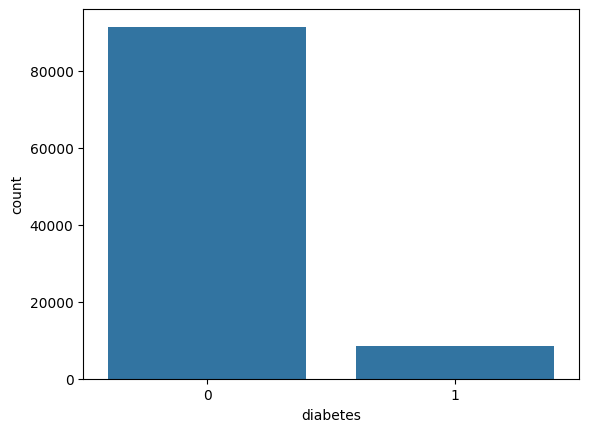

In [27]:
sns.countplot(data=df, x='diabetes')

In [ ]:
# Convert race columns to a single categorical value
def get_race(df)->str:
    if df['race:AfricanAmerican']:
        return 'AfricanAmerican'
    if df['race:Asian']:
        return 'Asian'
    if df['race:Caucasian']:
        return 'Caucasian'
    if df['race:Hispanic']:
        return 'Hispanic'
    if df['race:Other']:
        return 'Other'

if 'race' not in df.columns:
    df['race'] = df.apply(lambda x: get_race(x), axis=1)
    for col in df.columns:
        if col.startswith('race:'):
            df.drop(col, axis=1, inplace=True)
df 

,year,gender,age,location,hypertension,heart_disease,smoking_history,bmi,hbA1c_level,blood_glucose_level,diabetes,race
0,2020,Female,32.0,Alabama,0,0,never,27.32,5.0,100,0,Other
1,2015,Female,29.0,Alabama,0,0,never,19.95,5.0,90,0,Asian
2,2015,Male,18.0,Alabama,0,0,never,23.76,4.8,160,0,Other
3,2015,Male,41.0,Alabama,0,0,never,27.32,4.0,159,0,Caucasian
4,2016,Female,52.0,Alabama,0,0,never,23.75,6.5,90,0,AfricanAmerican
...,...,...,...,...,...,...,...,...,...,...,...,...
99995,2018,Female,33.0,Wyoming,0,0,never,21.21,6.5,90,0,Other
99996,2016,Female,80.0,Wyoming,0,0,No Info,36.66,5.7,100,0,Asian
99997,2018,Male,46.0,Wyoming,0,0,ever,36.12,6.2,158,0,Asian
99998,2018,Female,51.0,Wyoming,0,0,not current,29.29,6.0,155,0,AfricanAmerican


In [10]:
df_smoke_ratios = df.groupby('smoking_history')['diabetes'].value_counts().unstack()
df_smoke_ratios
df_smoke_ratios['ratio'] = df_smoke_ratios[1] / df_smoke_ratios[0]
df_smoke_ratios

diabetes,0,1,ratio
smoking_history,,,
No Info,34362,1454,0.042314
current,8338,948,0.113696
ever,3532,472,0.133635
former,7762,1590,0.204844
never,31749,3346,0.105389
not current,5757,690,0.119854


In [5]:
# Data Preprocessing
nan_summary = df.isna().sum()
print("NaN count before processing:\n", nan_summary[nan_summary > 0])

# Separate numeric and categorical 
numeric_cols = df.select_dtypes(include=[np.number]).columns
categorical_cols = df.select_dtypes(include=['object']).columns

encoder = LabelEncoder()
df['gender'] = encoder.fit_transform(df['gender'])
df['smoking_history'] = encoder.fit_transform(df['smoking_history'])
df=df.drop(columns='location')

NaN count before processing:
 Series([], dtype: int64)


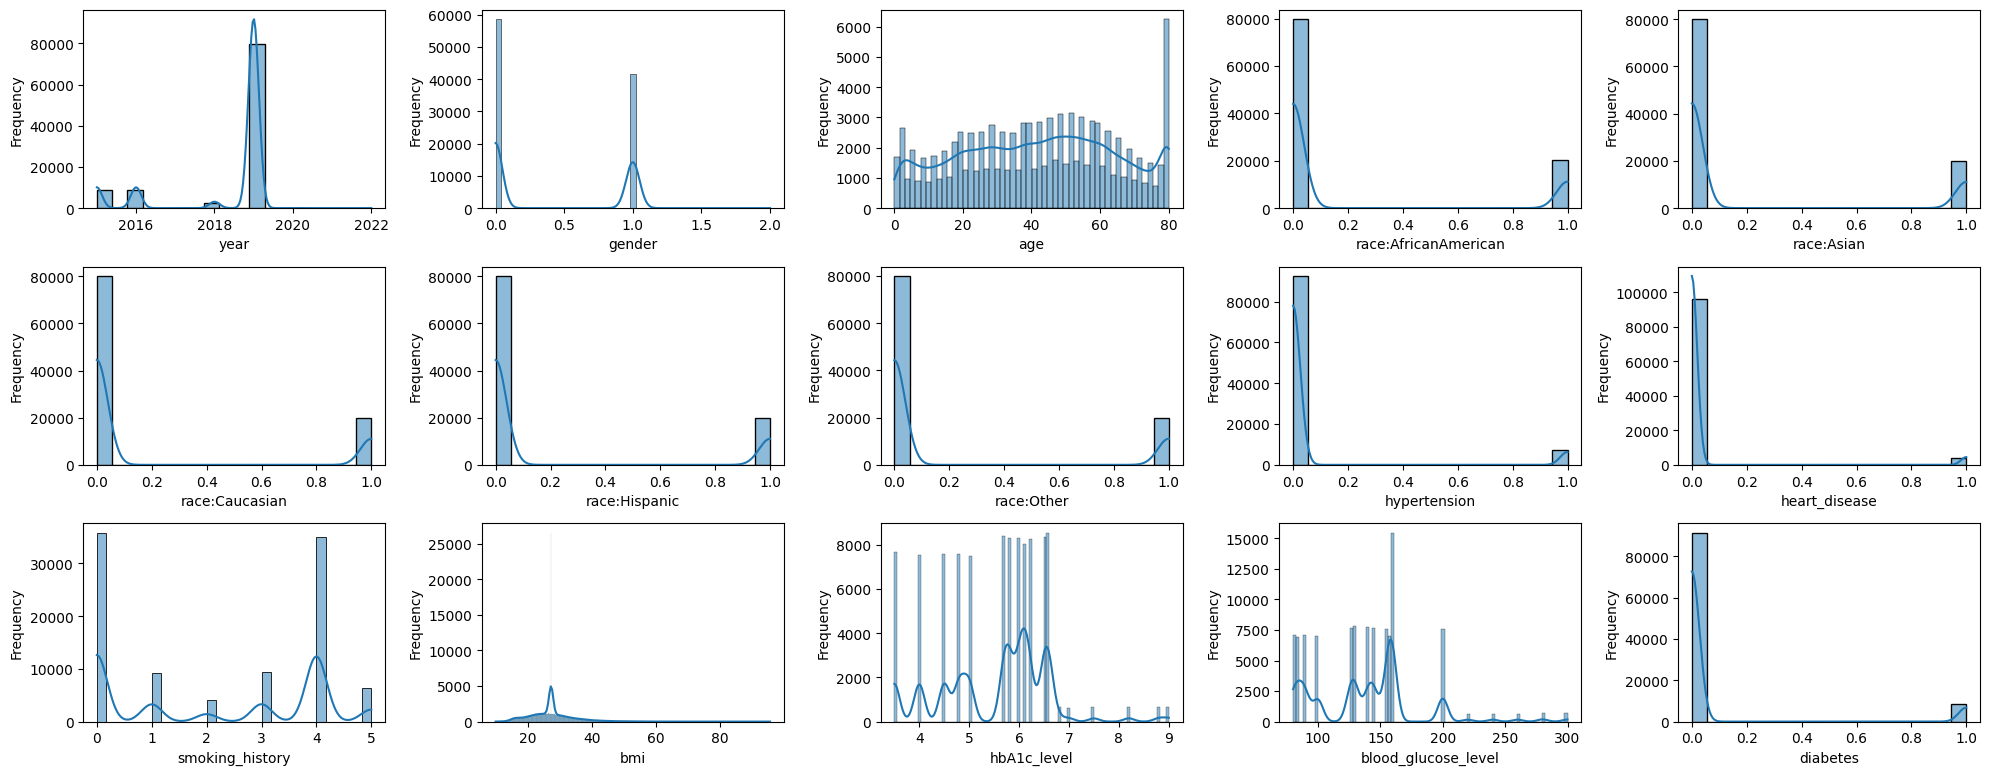

In [6]:
#Exploratory Data Analysis (EDA)

plt.figure(figsize=(20, 10))
plotnumber = 1
for column in df:
    if plotnumber <= 30:  
        ax = plt.subplot(4, 5, plotnumber)  
        sns.histplot(df[column], kde=True)  
        plt.xlabel(column)
        plt.ylabel('Frequency')
        
    plotnumber += 1

plt.tight_layout() 
plt.show()


In [ ]:
# creating features and label 

X = df.drop('diabetes', axis = 1)
y = df['diabetes']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.10 , random_state = 0)



In [ ]:
#logistic Regression

from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)

# model predictions

y_pred = log_reg.predict(X_test)


# accuracy score

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print(accuracy_score(y_train, log_reg.predict(X_train)))  # Train accuracy
rf_acc = accuracy_score(y_test, log_reg.predict(X_test))  # Test accuracy
print(rf_acc)
print(confusion_matrix(y_test, y_pred))

0.9603666666666667
0.9595
[[9043   74]
 [ 331  552]]


c:\Users\hadis\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#Random forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

rf = RandomForestClassifier(random_state=42, n_estimators=1000, n_jobs=-1) 

# Train the model
rf.fit(X_train, y_train)

# Model predictions
y_pred = rf.predict(X_test)

# Accuracy score
print(accuracy_score(y_train, rf.predict(X_train)))  # Train accuracy
rf_acc = accuracy_score(y_test, rf.predict(X_test))  # Test accuracy
print(rf_acc)
print(confusion_matrix(y_test, y_pred))



0.9998111111111111
0.9719
[[9104   13]
 [ 268  615]]


In [ ]:
from sklearn.svm import SVC

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

svm_clf = SVC(kernel='linear', C=1.0, random_state=42)


# Train the model
svm_clf.fit(X_train, y_train)

# Model predictions
y_pred = svm_clf.predict(X_test)

# Accuracy score
print(accuracy_score(y_train, rf.predict(X_train)))  # Train accuracy
rf_acc = accuracy_score(y_test, rf.predict(X_test))  # Test accuracy
print(rf_acc)
print(confusion_matrix(y_test, y_pred))


c:\Users\hadis\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


0.9153666666666667
0.9117
[[9073   44]
 [ 358  525]]


c:\Users\hadis\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [ ]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


# Initialize XGBoost classifier
xgb_clf = XGBClassifier(objective='binary:logistic',  # Use 'multi:softmax' for multiclass
                         eval_metric='logloss',       # Evaluation metric
                         use_label_encoder=False,     # Avoid warnings in new versions
                         random_state=42)

# Train the model
xgb_clf.fit(X_train, y_train)

# Model predictions
y_pred = xgb_clf.predict(X_test)

# Accuracy score
print(accuracy_score(y_train, xgb_clf.predict(X_train)))  # Train accuracy
xgb_acc = accuracy_score(y_test, y_pred)  # Test accuracy
print(xgb_acc)

# Confusion matrix
print(confusion_matrix(y_test, y_pred))


c:\Users\hadis\anaconda3\Lib\site-packages\xgboost\core.py:158: UserWarning: [15:41:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0c55ff5f71b100e98-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


0.9760111111111112
0.9706
[[9086   31]
 [ 263  620]]


In [ ]:
#Sigmoid (Platt Scaling)- Calibration method
from sklearn.calibration import CalibratedClassifierCV, calibration_curve
import matplotlib.pyplot as plt
import numpy as np

def plot_calibration_curve_sigmoid(classifier, X_train, y_train, X_test, y_test, method='sigmoid', n_bins=10):
    """
    Apply calibration to a classifier using Sigmoid (Platt Scaling) and plot the calibration curve.
    
    Parameters:
    - classifier: Base classifier (e.g., LogisticRegression, RandomForestClassifier)
    - X_train, y_train: Training data
    - X_test, y_test: Test data
    - method: 'sigmoid' for calibration
    - n_bins: Number of bins for the calibration curve
    """
    # Apply calibration
    calibrated_clf = CalibratedClassifierCV(classifier, method=method, cv='prefit')
    calibrated_clf.fit(X_train, y_train)
    
    # Predict probabilities
    y_prob = calibrated_clf.predict_proba(X_test)[:, 1]
    
    # Calibration Curve
    prob_true, prob_pred = calibration_curve(y_test, y_prob, n_bins=n_bins)
    
    plt.figure(figsize=(8, 6))
    plt.plot(prob_pred, prob_true, marker='o', label=f'{classifier.__class__.__name__} ({method.capitalize()})')
    plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectly Calibrated')
    plt.xlabel('Mean Predicted Probability')
    plt.ylabel('Fraction of Positives')
    plt.title('Calibration Curve Sigmoid (Platt Scaling)')
    plt.legend()
    plt.show()



In [ ]:
#Isotonic Calibration method

from sklearn.calibration import CalibratedClassifierCV, calibration_curve
import matplotlib.pyplot as plt
import numpy as np

def plot_calibration_curve_isotonic(classifier, X_train, y_train, X_test, y_test, method='isotonic', n_bins=10):
    """
    Apply calibration to a classifier using Isotonic Regression or Platt Scaling and plot the calibration curve.
    
    Parameters:
    - classifier: Base classifier (e.g., LogisticRegression, RandomForestClassifier)
    - X_train, y_train: Training data
    - X_test, y_test: Test data
    - method: 'isotonic' or 'sigmoid' for calibration
    - n_bins: Number of bins for the calibration curve
    """
    # Apply calibration
    calibrated_clf = CalibratedClassifierCV(classifier, method=method, cv='prefit')
    calibrated_clf.fit(X_train, y_train)
    
    # Predict probabilities
    y_prob = calibrated_clf.predict_proba(X_test)[:, 1]
    
    # Calibration Curve
    prob_true, prob_pred = calibration_curve(y_test, y_prob, n_bins=n_bins)
    
    plt.figure(figsize=(8, 6))
    plt.plot(prob_pred, prob_true, marker='o', label=f'{classifier.__class__.__name__} ({method.capitalize()})')
    plt.plot([0, 1], [0, 1], linestyle='--', label='Perfectly Calibrated')
    plt.xlabel('Mean Predicted Probability')
    plt.ylabel('Fraction of Positives')
    plt.title('Calibration Curve Isotonic Regression')
    plt.legend()
    plt.show()

c:\Users\hadis\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\hadis\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


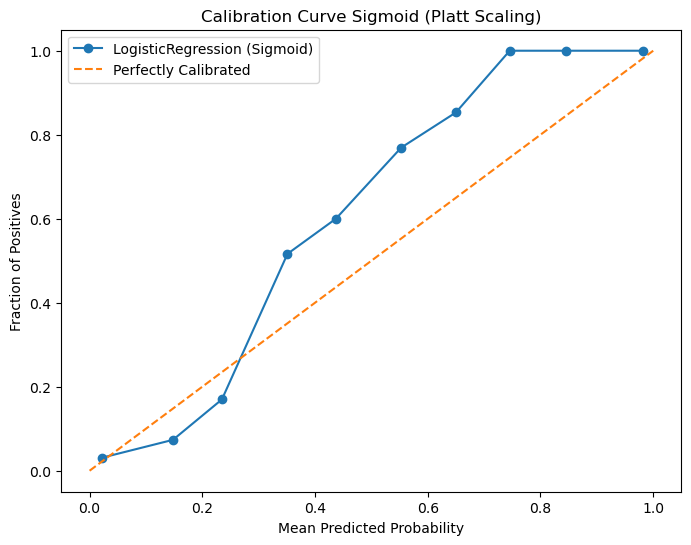

c:\Users\hadis\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(
c:\Users\hadis\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


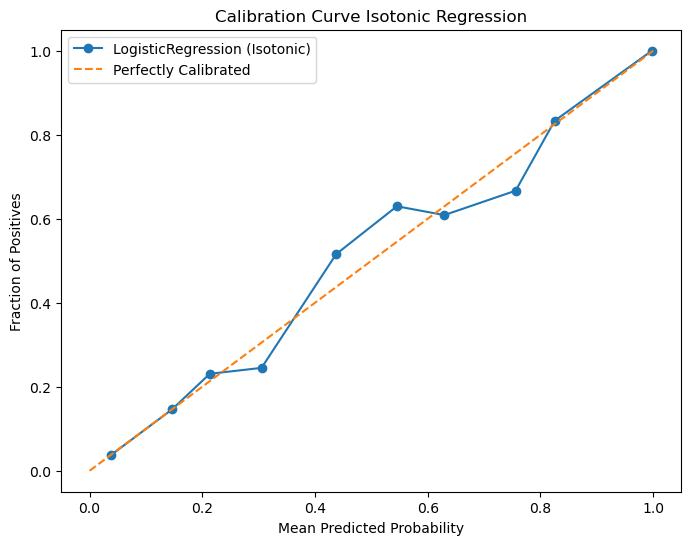

In [ ]:
#Logistic Regression
# Plot calibration curve using Sigmoid (Platt Scaling)+ Isotonic
plot_calibration_curve_sigmoid(log_reg, X_train, y_train, X_test, y_test, method='sigmoid')
plot_calibration_curve_isotonic(log_reg, X_train, y_train, X_test, y_test, method='isotonic')

c:\Users\hadis\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\hadis\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


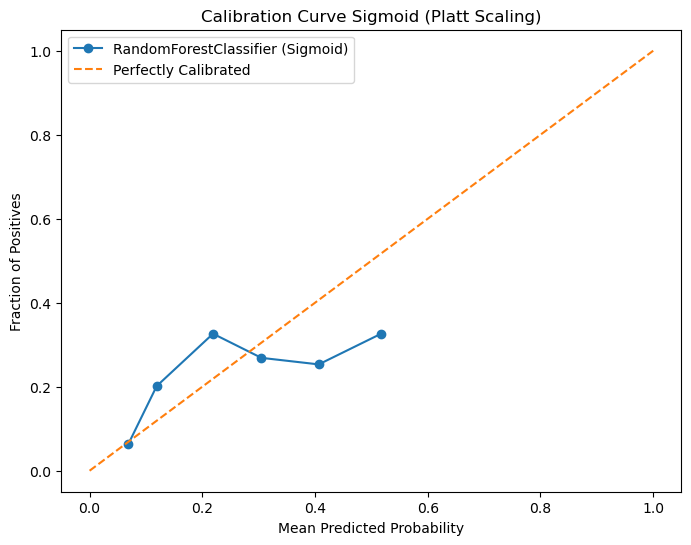

c:\Users\hadis\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
c:\Users\hadis\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


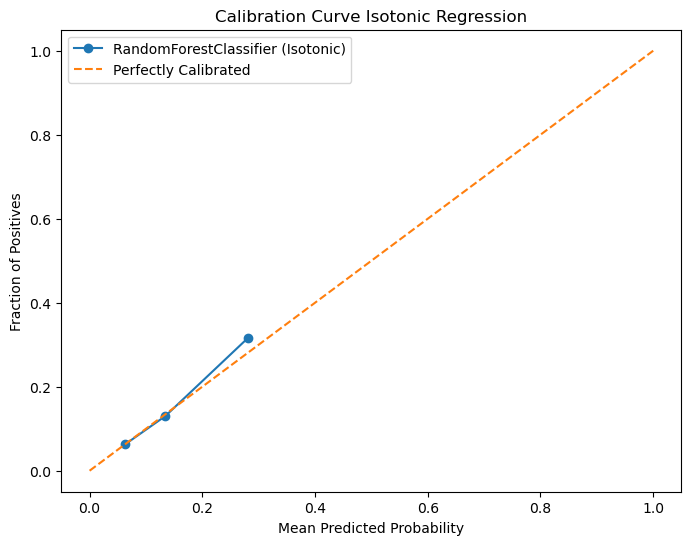

In [ ]:
#Random Forest 
# Plot calibration curve using Sigmoid (Platt Scaling) + Isotonic
plot_calibration_curve_sigmoid(rf, X_train, y_train, X_test, y_test, method='sigmoid')
plot_calibration_curve_isotonic(rf, X_train, y_train, X_test, y_test, method='isotonic')

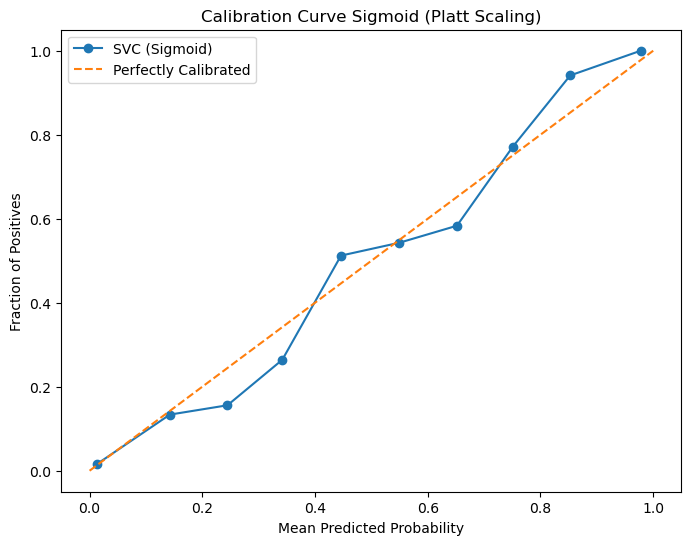

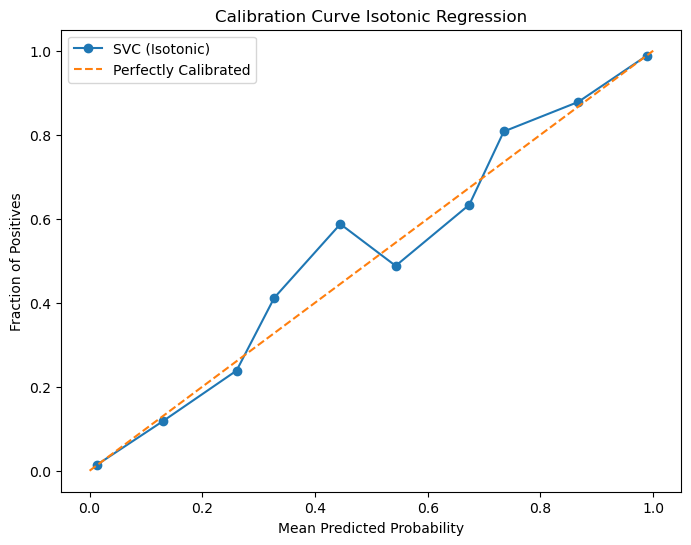

In [ ]:
#SVM 
# Plot calibration curve using Sigmoid (Platt Scaling) + Isotonic
plot_calibration_curve_sigmoid(svm_clf, X_train, y_train, X_test, y_test, method='sigmoid')
plot_calibration_curve_isotonic(svm_clf, X_train, y_train, X_test, y_test, method='isotonic')

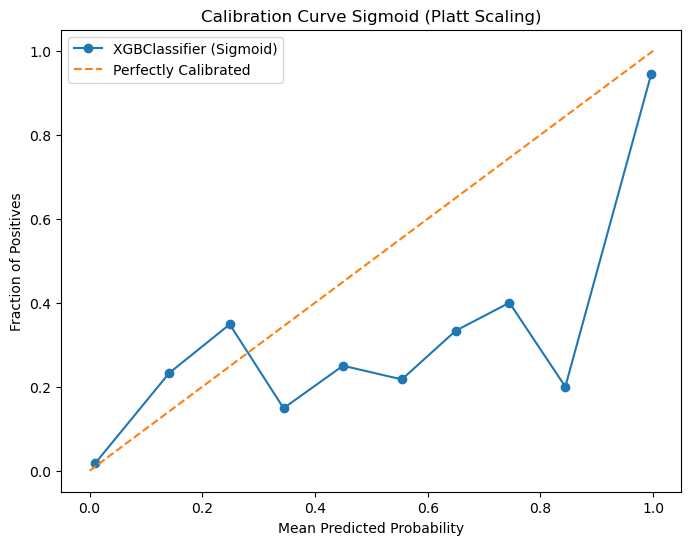

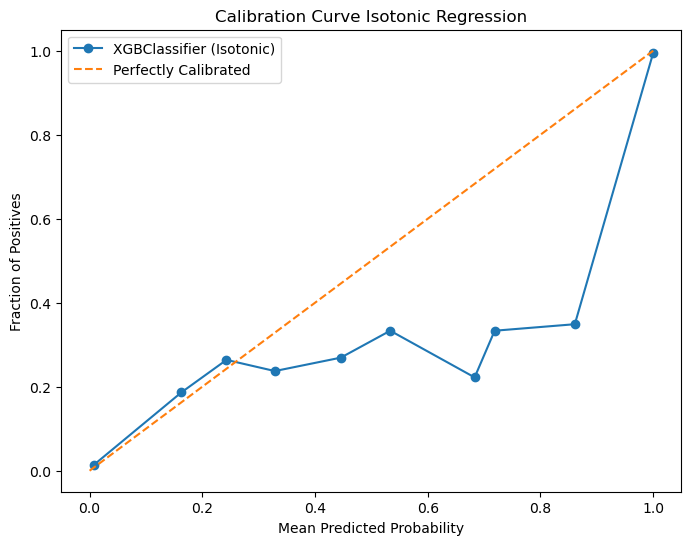

In [ ]:
#XGBOOST
# Plot calibration curve using Sigmoid (Platt Scaling) + Isotonic
plot_calibration_curve_sigmoid(xgb_clf, X_train, y_train, X_test, y_test, method='sigmoid')
plot_calibration_curve_isotonic(xgb_clf, X_train, y_train, X_test, y_test, method='isotonic')